# Gradient Descent

Based on Homework at https://www.user.tu-berlin.de/mtoussai/teaching/13-Optimization/
From M. Toussaint

In [27]:
using Plots
using LinearAlgebra

# plotly()
pyplot()

┌ Info: Recompiling stale cache file C:\Users\Daniel N\.julia\compiled\v1.0\PyPlot\oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190


Plots.PyPlotBackend()

### Problem 1

Consider the following functions which map $\mathbb{R}^n \to \mathbb{R}$

$$f_{sq}(x) = x^T x$$
$$f_{hole}(x) = 1 - \exp(-x^T x) $$

These would be fairly simple to optimize. We change the conditioning ("skewedness of the Hessian") of these functions to make them a bit more interesting.

Let $c \in \mathbb{R}$ be the conditioning parameter; let $C$ be the diagonal matrix with entries $C(i; i) = c^\frac{i - 1}{2 (n - 1)}$. We define the
test functions.

$$f_{sq}^c(x) = f_{sq}(Cx)$$
$$f_{hole}^c(x) = f_{hole}(Cx)$$

In the following, use $c = 100$

Implement these functions and display them over $x \in [-1,1]^2$.

##### First I will do this for the $x \in \mathbb{R}^2$ case

In [28]:
fsq2(x, y) = x^2 + y^2;
fhole2(x, y) = 1 - exp(-fsq2(x, y));

getCVal(c, i, n) = c^((i - 1) / (2 * (n - 1)));

In [29]:
xVals = yVals = range(-1, stop = 1, length = 40)

-1.0:0.05128205128205128:1.0

### Without the $C$ matrix

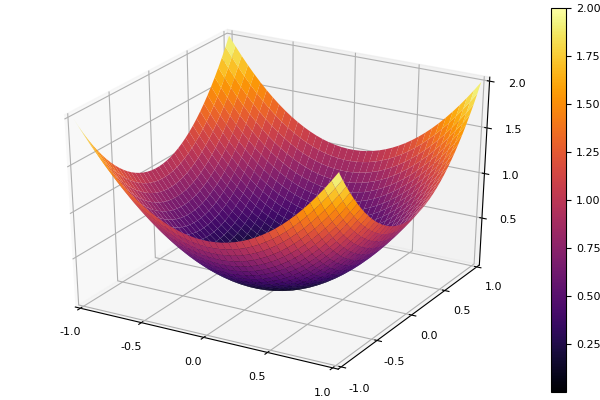

In [30]:
plot(xVals, yVals, fsq2, st = [:surface])

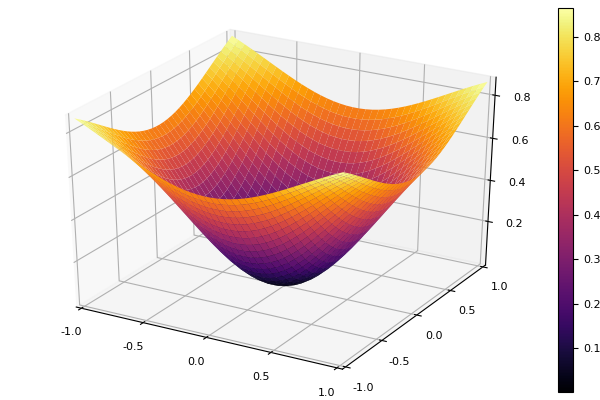

In [31]:
plot(xVals, yVals, fhole2, st = [:surface])

### With the $C$ Matrix

In [32]:
function cMat(c, n)
    matA =  zeros(n, n)
    for i in [1:n;]
        matA[i, i] = getCVal(c, i, n)
    end
    return Diagonal(matA)
end

cMat (generic function with 1 method)

In [33]:
cMat(100, 2)

2×2 Diagonal{Float64,Array{Float64,1}}:
 1.0    ⋅ 
  ⋅   10.0

In [34]:
cMat(64, 4)

4×4 Diagonal{Float64,Array{Float64,1}}:
 1.0   ⋅    ⋅    ⋅ 
  ⋅   2.0   ⋅    ⋅ 
  ⋅    ⋅   4.0   ⋅ 
  ⋅    ⋅    ⋅   8.0

In [35]:
cMatHere = cMat(100, 2)

fsq2C(x, y) = cMatHere[1, 1] * x^2 + cMatHere[2, 2] * y^2;
fhole2C(x, y) = 1 - exp(-fsq2C(x, y));

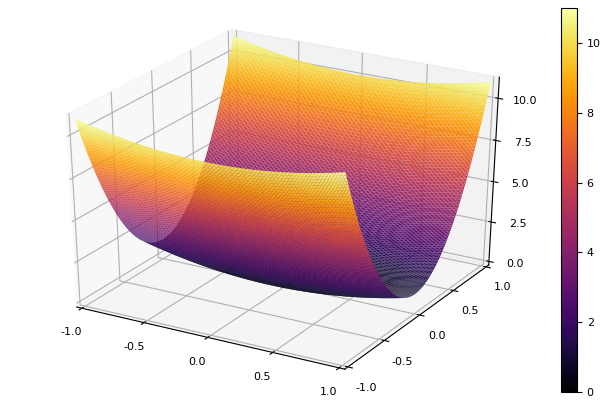

In [36]:
plot(-1:0.01:1, -1:0.01:1, fsq2C, st = [:surface])

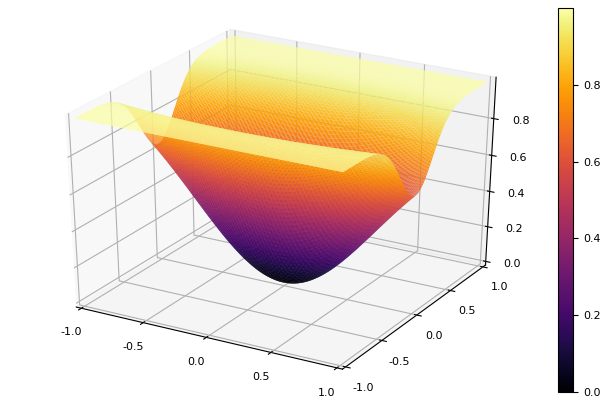

In [37]:
plot(-1:0.01:1, -1:0.01:1, fhole2C, st = [:surface])

## Now we make a _naive_ Gradient Descent

In [38]:
function gradNaive(xInit, gradX, alphaStep, numIter = 10)
    # xInit is the initial point
    
    xNext = xInit
    
    iterations = []
    append!(iterations, xInit)
    
    for it in 1:numIter
        xNext = xNext - alphaStep * gradX(xNext)
        
        append!(iterations, xNext)
    end
    
    return iterations
    
end

gradNaive (generic function with 2 methods)

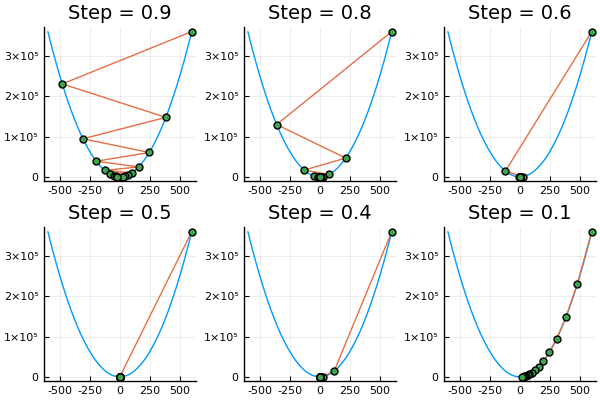

In [39]:
function compareStepSizes(x0, stepArray, thisLayout = (2,2))
    
    pltList = Any[]
    
    for (ind, alpha) in enumerate(stepArray)
        fsq1(x) = x^2
        dfdx1(x) = 2 * x

        xIterations = gradNaive(x0, dfdx1, alpha, 15)

        xRange = -x0:x0

        plt = plot(collect(xRange), fsq1, title = "Step = $alpha", legend = :none)
        plot!(xIterations, fsq1)
        scatter!(xIterations, fsq1, markersize=5)
        
        push!(pltList, plt)
    end
    
    plot(pltList..., layout = thisLayout)
end

xInit = 600
stepSizes = [0.9, 0.8, 0.6, 0.5, 0.4, 0.1]
layout = (2, 3)

compareStepSizes(xInit, stepSizes, layout)

## Now we make a _naive_ Gradient Descent with tolerance

In [40]:
function gradNaiveToler(xInit, gradX, alphaStep, tolerance = 0.5, maxIter = 10)
    # xInit is the initial point
    
    xNext = xInit
    xPrev = xInit
    xError = tolerance * 1000
    
    iterations = []
    append!(iterations, xInit)
    
    numIter = 1
    
    while xError > tolerance
        xPrev = xNext
        xNext = xNext - alphaStep * gradX(xNext)
        
        xError = abs(xPrev - xNext)
        
        append!(iterations, xNext)
        
        if numIter >= maxIter
           break
        else
            numIter += 1
        end
    end
    
    println("Finished in $numIter")
    
    return iterations
    
end

gradNaiveToler (generic function with 3 methods)

Finished in 44
Finished in 20
Finished in 8
Finished in 3
Finished in 8
Finished in 34


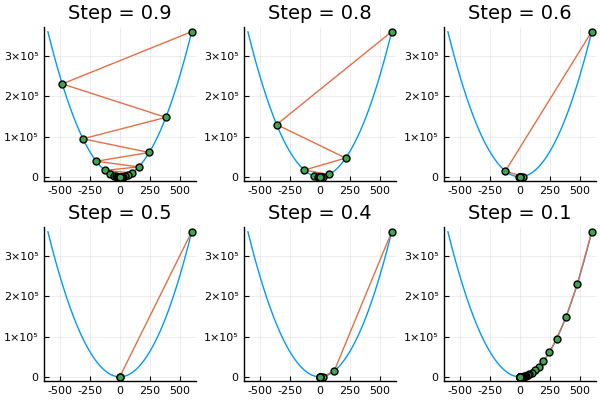

In [41]:
function compareStepSizes(x0, stepArray, thisLayout = (2,2))
    
    pltList = Any[]
    
    for (ind, alpha) in enumerate(stepArray)
        fsq1(x) = x^2
        dfdx1(x) = 2 * x

        xIterations = gradNaiveToler(x0, dfdx1, alpha, 0.1, 1000)

        xRange = -x0:x0

        plt = plot(collect(xRange), fsq1, title = "Step = $alpha", legend = :none)
        plot!(xIterations, fsq1)
        scatter!(xIterations, fsq1, markersize=5)
        
        push!(pltList, plt)
    end
    
    plot(pltList..., layout = thisLayout)
end

xInit = 600
stepSizes = [0.9, 0.8, 0.6, 0.5, 0.4, 0.1]
layout = (2, 3)

compareStepSizes(xInit, stepSizes, layout)

## Now we make a _naive_ Gradient Descent with tolerance on 2-Variable Function

In [42]:
function gradNaiveToler2Var(xInit, gradX, alphaStep, tolerance = 0.5, maxIter = 10)
    # xInit is the initial point
    
    xNext = xInit
    xPrev = xInit
    xError = tolerance * 1000
    
    iterations = []
    push!(iterations, xInit)
    
    numIter = 1
    
    while xError > tolerance
        xPrev = xNext
        xNext = xNext - alphaStep * gradX(xNext)
        
        xError = norm(xPrev - xNext, 2)
        
        push!(iterations, xNext)
        
        if numIter >= maxIter
           break
        else
            numIter += 1
        end
    end
    
    println("Finished in $numIter")
    
    return iterations
    
end

gradNaiveToler2Var (generic function with 3 methods)

In [43]:
firstDervfsq2 = [2 0; 0 2]

dfsq2(x) = firstDervfsq2 * x

x0 = [600, 400]
alphaVal = 0.8
tol = 0.1
maxNum = 100

itersEnd = gradNaiveToler2Var(x0, dfsq2, alphaVal, tol, maxNum);

Finished in 21


Finished in 21
Finished in 8


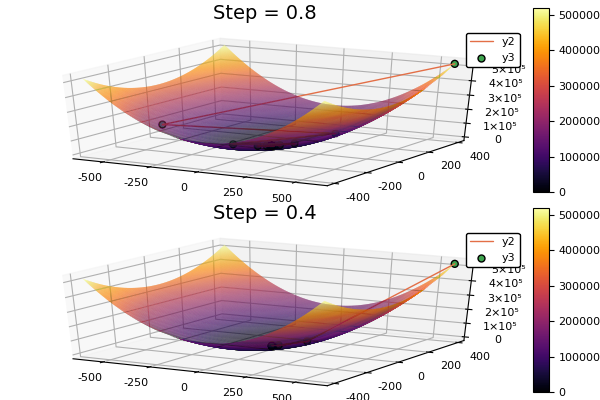

In [44]:
function compareStepSizes2Var(x0, stepArray, thisLayout = (2,2))
    
    pltList = Any[]
    
    for (ind, alphaHere) in enumerate(stepArray)
        
        firstDervfsq2 = [2 0; 0 2]
        dfsq2(x) = firstDervfsq2 * x
        fsq2(x, y) = x^2 + y^2;
        
        tol = 0.1
        maxNum = 100

        iterations = gradNaiveToler2Var(x0, dfsq2, alphaHere, tol, maxNum)
        
        xVals = [r[1] for r in iterations]
        yVals = [r[2] for r in iterations]
        
        fxyArray = [fsq2(xVals[ind], yVals[ind]) for ind in 1:length(xVals)]

        xRange = -x0[1]:x0[1]
        yRange = -x0[2]:x0[2]

        plt = plot(collect(xRange), collect(yRange), fsq2, title = "Step = $alphaHere", st = [:surface], alpha = 0.2)
#         display(plt)
        plot!(xVals, yVals, fxyArray)
        scatter!(xVals, yVals, fxyArray, markersize=5)
        
        push!(pltList, plt)
    end
    
    plot(pltList..., layout = thisLayout)
end

x0 = [600, 400]
stepArray = [0.8, 0.4]
layout = (2, 1)

# gradNaiveToler2Var(x0, dfsq2, alphaVal, tol, maxNum)
# compareStepSizes2Var(x0, stepArray, layout)

Finished in 21
Finished in 8


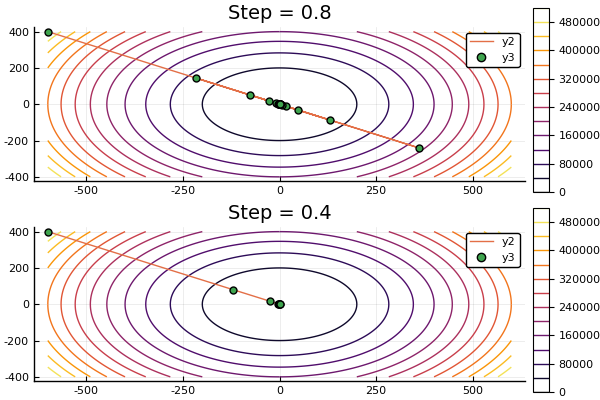

In [45]:
function compareStepSizes2Var(x0, stepArray, thisLayout = (2,2))
    
    pltList = Any[]
    
    for (ind, alphaHere) in enumerate(stepArray)
        
        firstDervfsq2 = [2 0; 0 2]
        dfsq2(x) = firstDervfsq2 * x
        fsq2(x, y) = x^2 + y^2;
        
        tol = 0.1
        maxNum = 100

        iterations = gradNaiveToler2Var(x0, dfsq2, alphaHere, tol, maxNum)
        
        xVals = [r[1] for r in iterations]
        yVals = [r[2] for r in iterations]
        
        fxyArray = [fsq2(xVals[ind], yVals[ind]) for ind in 1:length(xVals)]

        if x0[1] > 0
            xRange = -x0[1]:x0[1]
        else
            xRange = x0[1]:-x0[1]
        end
        
        if x0[2] > 0
            yRange = -x0[2]:x0[2]
        else
            yRange = x0[2]:-x0[2]
        end

        plt = plot(collect(xRange), collect(yRange), fsq2, title = "Step = $alphaHere", st = [:contour], alpha = 0.2)
#         display(plt)
        plot!(xVals, yVals)
        scatter!(xVals, yVals, markersize=5)
        
        push!(pltList, plt)
    end
    
    plot(pltList..., layout = thisLayout)
end

x0 = [-600, 400]
stepArray = [0.8, 0.4]
layout = (2, 1)

# gradNaiveToler2Var(x0, dfsq2, alphaVal, tol, maxNum)
compareStepSizes2Var(x0, stepArray, layout)

## Now we add back the $C$ Matrix

Finished in 30
Finished in 30
Finished in 30


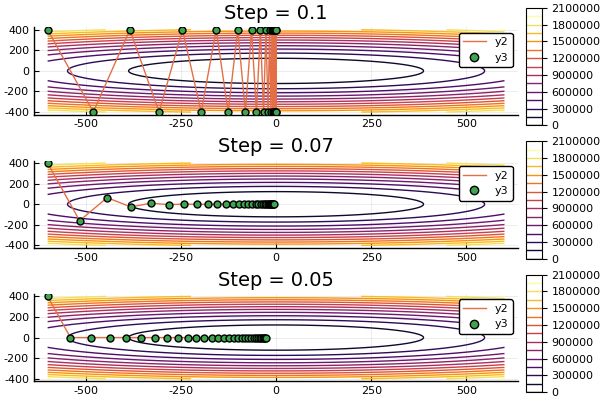

In [46]:
function compareStepSizes2Var(x0, stepArray, thisLayout = (2,2))
    
    pltList = Any[]
    
    for (ind, alphaHere) in enumerate(stepArray)
        
        cMatHere = cMat(100, 2)
        
        firstDervfsq2 = [2 0; 0 2]
        dfsq2(x) = cMatHere * firstDervfsq2 * x
        fsq2(x, y) = cMatHere[1, 1] * x^2 + cMatHere[2, 2] * y^2;
        
        tol = 0.1
        maxNum = 30

        iterations = gradNaiveToler2Var(x0, dfsq2, alphaHere, tol, maxNum)
        
        xVals = [r[1] for r in iterations]
        yVals = [r[2] for r in iterations]
        
        fxyArray = [fsq2(xVals[ind], yVals[ind]) for ind in 1:length(xVals)]
        
        if x0[1] > 0
            xRange = -x0[1]:x0[1]
        else
            xRange = x0[1]:-x0[1]
        end
        
        if x0[2] > 0
            yRange = -x0[2]:x0[2]
        else
            yRange = x0[2]:-x0[2]
        end
        

        plt = contour(collect(xRange), collect(yRange), fsq2, title = "Step = $alphaHere")
#         display(plt)
        plot!(xVals, yVals)
        scatter!(xVals, yVals, markersize=5)
        
        push!(pltList, plt)
    end
    
    plot(pltList..., layout = thisLayout)
end

x0 = [-600, 400]
stepArray = [0.1, 0.07, 0.05]
layout = (3, 1)

# gradNaiveToler2Var(x0, dfsq2, alphaVal, tol, maxNum)
compareStepSizes2Var(x0, stepArray, layout)

# Adaptive Stepsize

In [47]:
function gradAdaptToler2Var(xInit, funcX, gradX, stepInit, 
        tolerance = 0.5, maxIter = 10, verbose = false)
    
    # xInit is the initial point. Set up initial and error
    xNext = xInit
    xPrev = xInit
    xError = tolerance * 1000
    
    # Step size
    stepNext = stepInit
    stepUpFactor = 1.2
    stepDownFactor = 0.5
    
    # Save key data
    iterations = []
    steps = []
    push!(iterations, xInit)
    push!(steps, stepInit)
    
    numIter = 1
    
    while xError > tolerance
        
        if verbose
            println("Steping at $stepNext")
        end
        
        # ------------------
        # Begin Main part of Algorithm
        # ------------------
        if verbose
            println("Calculating the gradient")
        end
        # Calculate the gradient
        g = gradX(xNext)
        if verbose
            println("Updating x-position")
        end
        # Calcuclate the next step
        xNext = xNext - stepNext * g / norm(g, 2)
        
        # Adaptive Step Sizing
        if verbose
            print("Moved to ")
            print(funcX(xNext))
            print(" at ")
            println(xNext)
        end
        
        if funcX(xNext) <= funcX(xPrev)
            # Moved towards the minimum
            
            # Increase Stepsize
            stepNext = stepUpFactor * stepNext
            
            # Update the error
            xError = norm(xPrev - xNext, 2)
            
            # Accept Step
            xPrev = xNext
            
            if verbose
                println("Accepted")
            end
        else
            # Decrease Stepsize
            stepNext = stepDownFactor * stepNext
            
            # Reject Step
            if verbose
                println("Rejected")
            end
        end
        
        # ------------------
        # Save the iteration data
        # ------------------
        
        push!(iterations, xNext)
        push!(steps, stepNext)
        
        # ------------------
        # End Criteria
        # ------------------
        
        # Prevent the while loop going forever 
        # in case there is no convergence.
        if numIter >= maxIter
           break
        else
            numIter += 1
        end
    end
    
    println("Finished in $numIter")
#     println(steps)
    
    return iterations, steps
    
end

gradAdaptToler2Var (generic function with 4 methods)

### First, we try it on the square function

$$f(x) = x^T x$$

Still with $f(Cx)$

[1.0 0.0; 0.0 10.0]


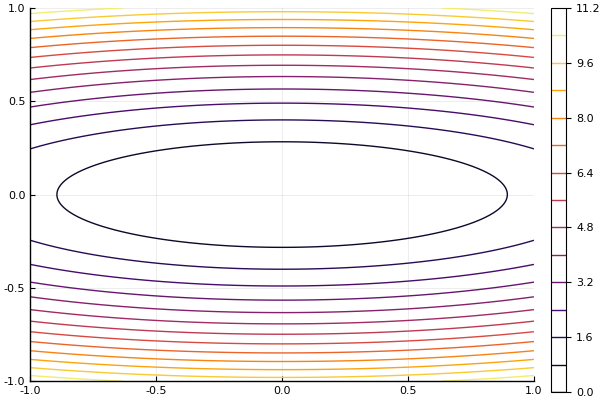

In [48]:
cMatHere = cMat(100, 2)
println(cMatHere)
        
firstDervfsq2 = [2 0; 0 2]
dfsq2C(x) = cMatHere * firstDervfsq2 * x
fsq2C(x) = cMatHere[1, 1] * x[1]^2 + cMatHere[2, 2] * x[2]^2;

contour(-1:0.01:1, -1:0.01:1, fsq2C)

Finished in 43


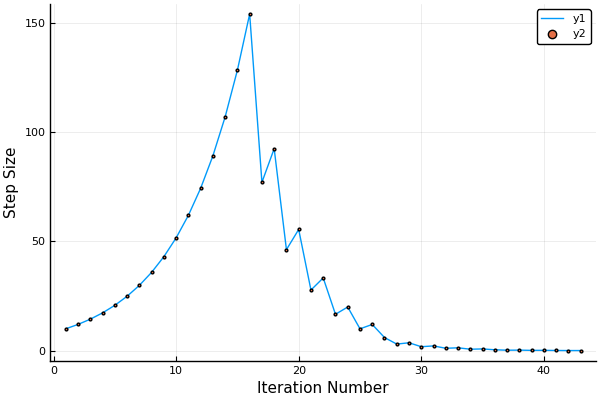

In [49]:
x0 = [-600, 400]
tol = 0.1
maxNum = 100
alphaStart = 10

# gradAdaptToler2Var(xInit, funcX, gradX, stepInit, tolerance = 0.5, maxIter = 10)
iterations, steps = gradAdaptToler2Var(x0, fsq2C, dfsq2C, alphaStart, tol, maxNum);

plot(steps)
scatter!(steps, markersize = 2)
xlabel!("Iteration Number")
ylabel!("Step Size")

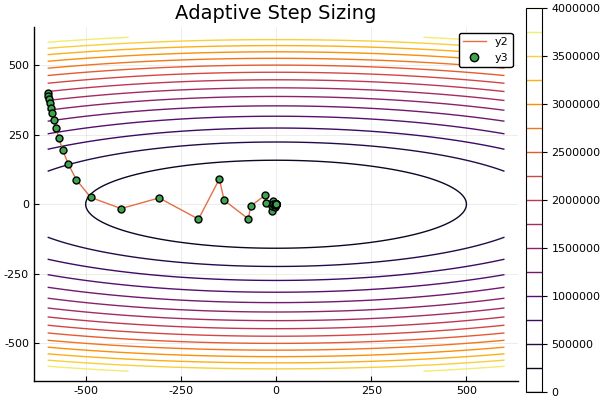

In [50]:
xVals = [r[1] for r in iterations]
yVals = [r[2] for r in iterations]

fxyArray = [fsq2C(xVals[ind], yVals[ind]) for ind in 1:length(xVals)]

xylimit = max(abs(x0[1]), abs(x0[2]))

xyRange = -xylimit:xylimit

plt = contour(collect(xyRange), collect(xyRange), fsq2C, title = "Adaptive Step Sizing")
plot!(xVals, yVals)
scatter!(xVals, yVals, markersize=5)

### Next we try it on the Gaussian

$$f_{hole}(x) = 1 - \exp(-x^T x) $$

Still with $f_{hole}(Cx)$

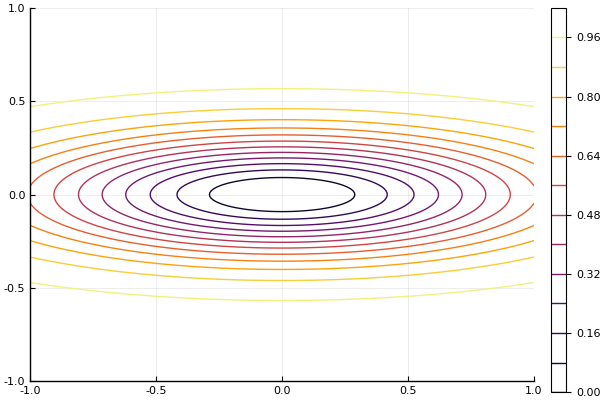

In [51]:
cMatHere = cMat(100, 2)

fsq2C(x) = cMatHere[1, 1] * x[1]^2 + cMatHere[2, 2] * x[2]^2;
fhole2C(x) = 1 - exp(-(fsq2C(x)));

firstDervHole2(x) = [-fhole2(x)+1 0; 0 -fhole2(x)+1]

dfhole2(x) = 2 * cMatHere^2 * firstDervfsq2 * x

contour(-1:0.01:1, -1:0.01:1, fhole2C)

Finished in 100


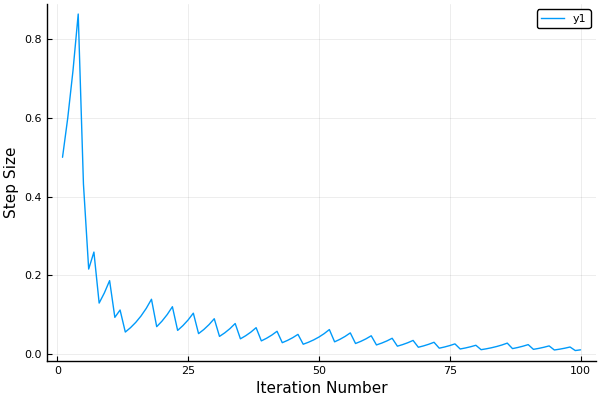

In [52]:
x0 = [1, 2]
tol = 0.01
maxNum = 200
alphaStart = 0.5

# gradAdaptToler2Var(xInit, funcX, gradX, stepInit, tolerance = 0.5, maxIter = 10)
iterations, steps = gradAdaptToler2Var(x0, fhole2C, dfhole2, alphaStart, tol, maxNum);

plot(steps)
xlabel!("Iteration Number")
ylabel!("Step Size")

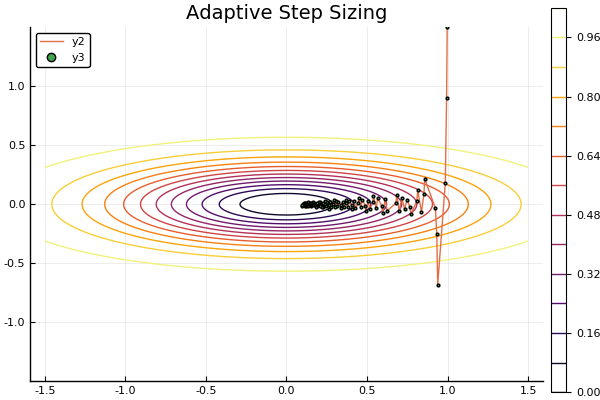

In [53]:
xVals = [r[1] for r in iterations]
yVals = [r[2] for r in iterations]

fxyArray = [fhole2(xVals[ind], yVals[ind]) for ind in 1:length(xVals)]

xylimit = 1.5 # max(abs(x0[1]), abs(x0[2]), 2)

xyRange = -xylimit:0.01:xylimit

plt = contour(collect(xyRange), collect(xyRange), fhole2C, title = "Adaptive Step Sizing", legend = :topleft)
plot!(xVals, yVals)
scatter!(xVals, yVals, markersize=2)
ylims!((-xylimit, xylimit))
